In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data=pd.read_csv(r"C:\Users\etisalat\Downloads\Position_Salaries.csv")

In [3]:
data

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000
5,Region Manager,6,150000
6,Partner,7,200000
7,Senior Partner,8,300000
8,C-level,9,500000
9,CEO,10,1000000


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 3 columns):
Position    10 non-null object
Level       10 non-null int64
Salary      10 non-null int64
dtypes: int64(2), object(1)
memory usage: 320.0+ bytes


In [20]:
x=data.iloc[:,1:-1].values
y=data.iloc[:,-1].values

In [21]:
x

array([[ 1],
       [ 2],
       [ 3],
       [ 4],
       [ 5],
       [ 6],
       [ 7],
       [ 8],
       [ 9],
       [10]], dtype=int64)

In [22]:
y

array([  45000,   50000,   60000,   80000,  110000,  150000,  200000,
        300000,  500000, 1000000], dtype=int64)

### create a polynomial model

In [26]:
from sklearn.linear_model import LinearRegression

In [27]:
from sklearn.preprocessing import PolynomialFeatures

In [37]:
features=PolynomialFeatures(degree=2)

In [41]:
x_poly=features.fit_transform(x)
x_poly

array([[  1.,   1.,   1.],
       [  1.,   2.,   4.],
       [  1.,   3.,   9.],
       [  1.,   4.,  16.],
       [  1.,   5.,  25.],
       [  1.,   6.,  36.],
       [  1.,   7.,  49.],
       [  1.,   8.,  64.],
       [  1.,   9.,  81.],
       [  1.,  10., 100.]])

In [39]:
model=LinearRegression()

In [42]:
model.fit(x_poly,y)

LinearRegression()

### predicting new data

In [47]:
model.predict(features.fit_transform([[6]]))

array([134484.84848485])

### proving the prediction results

In [52]:
model.coef_

array([      0.        , -132871.21212121,   19431.81818182])

In [53]:
model.intercept_

232166.6666666665

### model equation 

In [54]:
(-132871.21212121 * 6)+(19431.81818182 *6**2)+232166.6666666665

134484.8484849265

In [48]:
data.head()

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000


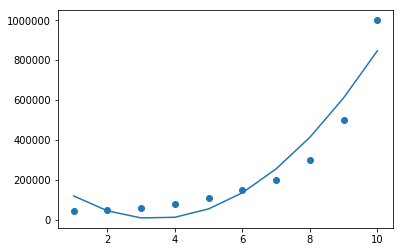

In [51]:
plt.scatter(data["Level"],data["Salary"])
plt.plot(data["Level"],model.predict(x_poly))

### linear regression

In [55]:
from sklearn.linear_model import LinearRegression

In [56]:
model2=LinearRegression()

In [58]:
model2.fit(x,y)

LinearRegression()

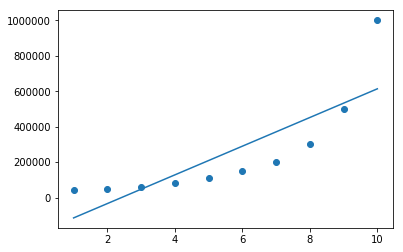

In [61]:
plt.scatter(data["Level"],data["Salary"])
plt.plot(data["Level"],model2.predict(x))

In [62]:
model2.predict(([[6]]))

array([289939.39393939])